<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weekfour/raman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initial


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
symbol_rate = 10e9 #10 gigabauds
EDFA_total_power = 15 #dbm
lambda_light = 1540e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
EDFA_noise = 4.7
discrete_losses = np.zeros(length)
measured_nm =[1517, 1517.1683, 1517.5523, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.72, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.72, 1552.1225, 1552.52, 1552.926, 1553.328, 1553.73, 1554.134, 1554.537, 1554.94, 1555.34, 1555.747, 1556.15, 1556.55, 1556.96, 1557.36, 1557.768, 1557.768, 1558.17, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.2, 1560.6, 1561.012, 1561.42, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.27, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.72, 1567.13, 1567.54, 1567.95, 1568.36, 1568.36, 1568.77, 1569.18, 1569.594, 1570, 1570.416, 1570.83, 1571.239, 1571.65, 1572.06, 1572.475, 1572.888, 1573.3, 1573.71, 1574.127, 1574.54, 1574.95, 1575.367, 1575.78, 1576.196, 1576.61, 1577.03, 1577.44, 1577.85, 1578.27, 1578.686, 1579.102, 1579.52, 1579.94, 1580.35, 1581]
measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]
smf28 = {'attenuation_per_km': 0.18, 'dispersion': 18, 'dispersion_slope' :0.092,'attenuation_slope_quadratic' : 2.5e-4} # Adjusted value
leaf = {'attenuation_per_km': 0.22, 'dispersion': -4, 'dispersion_slope' : -0.12,'attenuation_slope_quadratic' : 2.5e-4} # Adjusted value
cable_types = {'smf28': smf28, 'leaf': leaf}
span_layout = [('smf28', 33), ('leaf', 67)]
discrete_losses = np.zeros(length)

# Initialize channeled_lambdas
channels = 70 # Ensure 'channels' is defined before using it here
channeled_lambdas = np.zeros(channels)
for i in range(channels):
  channeled_lambdas[i] = lambda_light + i*0.4e-9

# Modified attenuate function to use wavelength-dependent attenuation
def attenuate(signal, noise, location, fiber_params, lambda_signal_nm, lambda_ref_nm=1550):
    """
    Applies wavelength-dependent attenuation to signal and noise power (in mW) for a single channel over 1 km.
    Assumes signal and noise are arrays representing power at different locations.
    """
    if location + 1 < len(signal):
        # Calculate wavelength-dependent attenuation for the current fiber segment and signal wavelength
        attenuation_per_km_dB = calculate_wavelength_dependent_attenuation(
            fiber_params, lambda_signal_nm, lambda_ref_nm
        )

        # Apply attenuation to signal and noise for the current kilometer
        # Ensure we are working with dBm here for subtraction
        signal[location + 1] = signal[location] - attenuation_per_km_dB
        noise[location + 1] = noise[location] - attenuation_per_km_dB


# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

#chomatic disperson
def chrom_dispersion_total(positive_amount,negative_amount,lambda_signal, Is_Compensated, length,span):
  distance = np.arange(0,length,1)
  dispersion = np.zeros(len(distance))
  pos_dispersion = positive_amount*lambda_signal*1e9
  neg_dispersion = negative_amount*lambda_signal*1e9
  if(Is_Compensated):
    accumulated_dispersion = 0
    current_slope = pos_dispersion # Start with the positive slope
    for i in range(1, length):
        # Check if we are at a span boundary
        if i % span == 0:
            # Swap the slope between positive_amount and negative_amount
            if current_slope == pos_dispersion:
                current_slope = neg_dispersion
            else:
                current_slope = pos_dispersion
        accumulated_dispersion += current_slope # Add dispersion based on the current slope
        dispersion[i] = accumulated_dispersion

  else:
    dispersion = distance*positive_amount # Only positive dispersion if not compensated

  return dispersion


import numpy as np
from scipy.interpolate import interp1d

# Assuming EDFA_total_power, EDFA_noise, channeled_lambdas, gain_weights are defined elsewhere
# Assuming c and bandwidth_nm are defined elsewhere
# Assuming power_floor_mW is defined globally
# Assuming measured_nm and measured_db are defined globally


# --- EDFA Function with Simplified Gain Saturation (Revised - Attempt 14 - Debug Internal Values) ---
def const_power_EDFA_with_tilt_saturation(multi_channel_signal_power, multi_channel_noise, const_power_dBm, channeled_lambdas, EDFA_noise, location, gain_weights):
    # In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    # In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    c = 3e8 # Speed of light
    epsilon = 1e-20 # Local epsilon for numerical stability
    saturation_output_power_dBm = const_power_dBm - 0 # Example saturation level
    saturation_output_power_mW = 10**(saturation_output_power_dBm / 10)
    # Get input power for current location in mW
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)
    target_total_power_mW = 10**(const_power_dBm/10)

    # Ensure total input power is not zero or negative
    total_input_power_mW_sum = np.maximum(total_input_power_mW_sum, epsilon)

    # Calculate the target gain profile in linear based on the spectral tilt (gain_weights in dB)
    gain_tilt_linear = 10**(gain_weights / 10)

    actual_total_output_power_mW_target = min(target_total_power_mW, saturation_output_power_mW) # Output power is target or saturation limit
    # --- End Simplified Gain Saturation ---
    desired_output_power_per_channel_linear = gain_tilt_linear * (actual_total_output_power_mW_target / (np.sum(gain_tilt_linear) + epsilon))

    gain_applied_linear_per_channel = desired_output_power_per_channel_linear / (total_input_power_mW_per_channel + epsilon)


    # --- Debug Print: Internal EDFA Values ---
    span_num = int(location/span)

    # Calculate and print the output power based on the calculated gain applied
    calculated_output_power_mW_per_channel = total_input_power_mW_per_channel * gain_applied_linear_per_channel # Corrected variable name typo
    # Apply the calculated gains to signal and noise separately
    multi_channel_signal_power[:, location] = current_signal_input_mW * gain_applied_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * gain_applied_linear_per_channel

    # Add ASE noise *after* amplification
    f_channeled = c / channeled_lambdas
    bandwidth_nm = 0.1e-9 # Assuming bandwidth_nm is defined globally or passed
    bandwidth_freq = bandwidth_nm * (c / (channeled_lambdas**2))

    power_ase_per_amp_mW_per_channel = planks_const * f_channeled * EDFA_noise_linear * bandwidth_freq * (gain_applied_linear_per_channel - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0 # Ensure non-negative ASE noise

    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel
    current_total_output_mW_sum_check = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    final_scaling_factor_safeguard = actual_total_output_power_mW_target / (current_total_output_mW_sum_check + epsilon)

    multi_channel_signal_power[:, location] *= final_scaling_factor_safeguard
    multi_channel_noise[:, location] *= final_scaling_factor_safeguard


# Function for pre-emphasis calculation
def calculate_preemphasis_powers(channels, edfa_gain_weights_db, target_total_initial_power_dBm):
    """
    Calculates initial channel powers with pre-emphasis based on inverse EDFA gain weights.

    Args:
        channels (int): Number of channels.
        edfa_gain_weights_db (np.ndarray): EDFA gain weights in dB.
        target_total_initial_power_dBm (float): Target total initial power in dBm.

    Returns:
        np.ndarray: Initial channel powers in dBm.
    """
    # Calculate target total initial power in mW
    target_total_initial_power_mW = 10**(target_total_initial_power_dBm / 10)

    # Calculate initial power shape based on the inverse of EDFA gain weights (in linear)
    # We want initial_power * EDFA_gain_linear to be constant across channels
    # EDFA_gain_linear is proportional to 10**(edfa_gain_weights_db / 10)
    # So, initial_power should be proportional to 1 / (10**(edfa_gain_weights_db / 10)) = 10**(-edfa_gain_weights_db / 10)
    initial_power_shape_linear = 10**(-edfa_gain_weights_db / 10)

    # Normalize the initial power shape so that the total power equals the target total initial power
    normalized_initial_power_mW = (initial_power_shape_linear / np.sum(initial_power_shape_linear)) * target_total_initial_power_mW

    # Convert initial powers to dBm
    channel_power_dbm = 10*np.log10(normalized_initial_power_mW)
    return channel_power_dbm



def calculate_wavelength_dependent_attenuation(cable_type_params, lambda_signal_nm_input, lambda_min_attenuation_nm_input=1550):
    """
    Calculates the attenuation per kilometer at a given signal wavelength using a quadratic model.

    Args:
        cable_type_params (dict): Dictionary containing 'attenuation_per_km' (at min attenuation wavelength)
                                  and 'attenuation_slope_quadratic' for the cable type.
        lambda_signal_nm_input (float): The signal wavelength in nanometers.
        lambda_min_attenuation_nm_input (float): The wavelength of minimum attenuation in nanometers (default is 1550 nm).

    Returns:
        float: The attenuation at the signal wavelength in dB/km.
    """
    alpha_min = cable_type_params.get('attenuation_per_km', 0) # Base attenuation at minimum wavelength
    beta_quadratic = cable_type_params.get('attenuation_slope_quadratic', 0) # Quadratic slope parameter
    # Explicitly assign input wavelengths to local variables for clarity
    signal_wavelength_nm = lambda_signal_nm_input
    min_attenuation_wavelength_nm = lambda_min_attenuation_nm_input

    # Quadratic model for attenuation: alpha(lambda) = alpha_min + beta * (lambda - lambda_min)^2
    wavelength_difference_nm = signal_wavelength_nm - min_attenuation_wavelength_nm
    # Ensure attenuation is positive (loss)
    attenuation_at_lambda = alpha_min + beta_quadratic * ((wavelength_difference_nm)**2)
    return attenuation_at_lambda if attenuation_at_lambda > 0 else 0


def calculate_dispersion_at_wavelength(cable_type_params, lambda_signal_nm, lambda_ref_nm=1550):

    D_ref = cable_type_params.get('dispersion', 0)
    S_ref = cable_type_params.get('dispersion_slope', 0)
    # Correcting the unit of lambda_ref_nm in the calculation
    dispersion_at_lambda = D_ref + S_ref * (lambda_signal_nm - lambda_ref_nm*1e9)
    return dispersion_at_lambda

def chrom_dispersion_total_with_slope(length, span_layout, cable_types, channeled_lambdas_nm, lambda_ref_nm=1550):
    num_channels = len(channeled_lambdas_nm)
    accumulated_dispersion = np.zeros((num_channels, length + 1)) # Store accumulated dispersion per km
    total_span_length = sum(length for _, length in span_layout)

    # Pre-calculate which cable type is used for each kilometer within a span
    span_fiber_types = []
    for cable_type_name, segment_length in span_layout:
        span_fiber_types.extend([cable_type_name] * segment_length)

    for i in range(length): # Loop through each kilometer (from 0 to length-1)
        km_in_current_span = i % total_span_length

        # Determine the cable type for the current kilometer using the pre-calculated list
        current_cable_type_name = span_fiber_types[km_in_current_span]
        current_cable_type_params = cable_types[current_cable_type_name]


        # Calculate incremental dispersion for each channel at this kilometer
        for j in range(num_channels):
            dispersion_per_km_at_lambda = calculate_dispersion_at_wavelength(
                current_cable_type_params, channeled_lambdas_nm[j], lambda_ref_nm
            )
            # Accumulate the dispersion - Using a temporary variable for clarity and to potentially avoid subtle indexing issues
            current_accumulated_value = accumulated_dispersion[j, i]
            new_accumulated_value = current_accumulated_value + dispersion_per_km_at_lambda
            accumulated_dispersion[j, i+1] = new_accumulated_value


    return accumulated_dispersion

# --- Attenuation Function (Included here for self-containment, or ensure it's run in a preceding cell) ---
def apply_attenuation(power_mW, attenuation_per_km_dB, length_km):
    """Applies attenuation to power (in mW) over a given length of fiber."""
    attenuation_linear = 10**(-attenuation_per_km_dB / 10)
    power_after_attenuation_mW = power_mW * (attenuation_linear ** length_km)
    return power_after_attenuation_mW
# --- End Attenuation Function ---
def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    """Applies a gain equalizer to flatten the total power spectrum to a target level per channel."""
    epsilon = 1e-20  # Small value for numerical stability

    # 1. Access power at the specified location (after EDFA):
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    current_total_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW

    # Calculate the total target power in mW
    target_total_power_mW = 10**(target_total_power_dBm / 10)

    # Calculate the target power per channel (assuming equal power distribution after equalization)
    target_power_per_channel_mW = target_total_power_mW / len(current_total_power_mW_per_channel)

    # 2. Calculate the required linear gain for each channel to reach the target power per channel
    # Avoid division by zero or near-zero input power
    gain_needed_linear_per_channel = np.zeros_like(current_total_power_mW_per_channel)
    non_zero_power_mask = current_total_power_mW_per_channel > epsilon
    gain_needed_linear_per_channel[non_zero_power_mask] = target_power_per_channel_mW / (current_total_power_mW_per_channel[non_zero_power_mask] + epsilon)

    # Apply the calculated linear gains to both the signal and noise power at the current location
    multi_channel_signal_power[:, location] = current_signal_input_mW * gain_needed_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * gain_needed_linear_per_channel

    # Note: This simplified model assumes the GE itself does not add noise.

#current


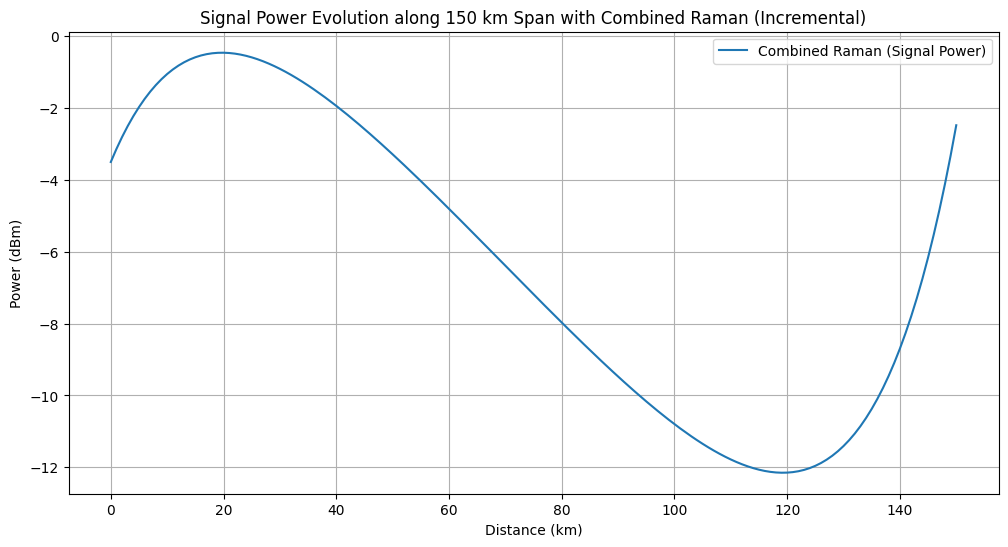

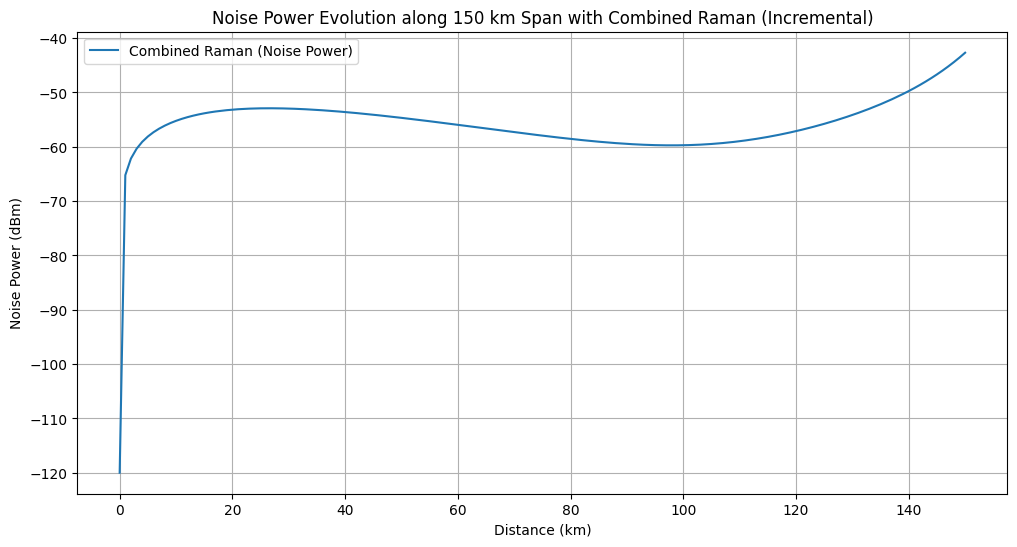

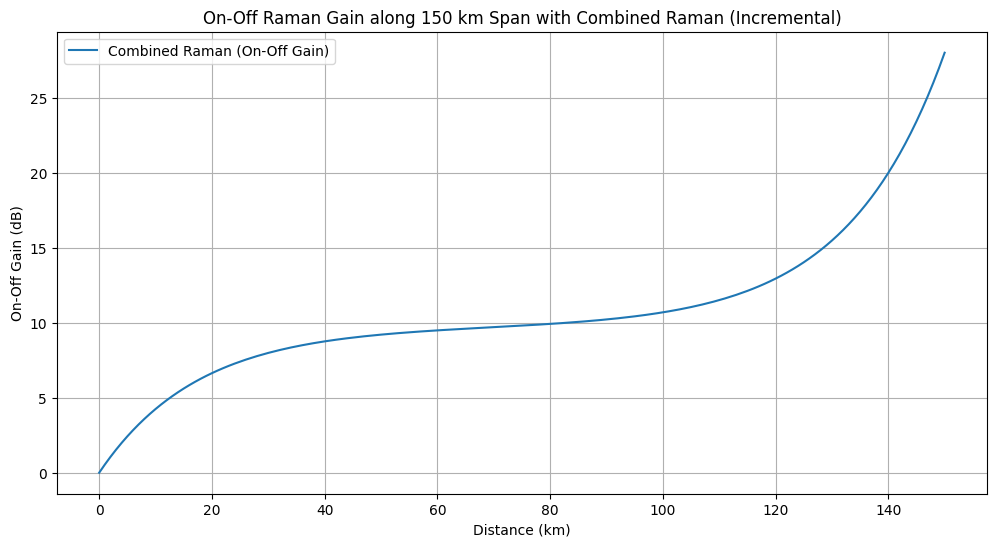

Final Signal Power (Combined - Incremental): -2.48 dBm
Final Noise Power (Combined - Incremental): -42.68 dBm
Net Gain/Loss at the end of fiber (Combined - Incremental): 1.02 dB
Final On-Off Raman Gain at the end of fiber (Combined - Incremental): 28.02 dB


In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
span_length_km = 150
initial_power_dBm = -3.5
initial_power_mW = 10**(initial_power_dBm / 10)
signal_wavelength_nm = 1550
num_points = span_length_km + 1 # Simulate at 1km intervals
dz = 1 # Step size in km

# Define physical constants
h = 6.626e-34 # Planck's constant (J*s)
c = 3e8 # Speed of light (m/s)


# Assume standard SMF28 fiber parameters and add Raman parameters
# Define smf28 parameters here
smf28 = {'attenuation_per_km': 0.18, 'dispersion': 18, 'dispersion_slope' :0.092,'attenuation_slope_quadratic' : 2.5e-4} # Adjusted value

fiber_params_smf28_raman = smf28.copy()
fiber_params_smf28_raman['raman_gain_efficiency'] = 0.5 # Example value, adjust as needed
fiber_params_smf28_raman['attenuation_per_km_pump'] = 0.25 # Example value, adjust as needed (often higher than signal attenuation)

# Function to calculate wavelength-dependent attenuation (assuming it's defined elsewhere or use a placeholder)
# Define the placeholder function here BEFORE it is called
def calculate_wavelength_dependent_attenuation(fiber_params, wavelength_nm):
    # Placeholder function - in a real scenario, this would be more complex
    # Assuming attenuation is roughly constant around 1550nm for SMF28
    # Use the base attenuation value from fiber_params
    return fiber_params.get('attenuation_per_km', 0.2) # Default to 0.2 if not found


attenuation_per_km_signal = calculate_wavelength_dependent_attenuation(
    fiber_params_smf28_raman, signal_wavelength_nm
)
attenuation_per_km_pump = fiber_params_smf28_raman['attenuation_per_km_pump']


# Initialize power arrays to store power at each km for the Combined case
signal_power_combined_mW_per_km = np.zeros(num_points)
noise_power_combined_mW_per_km = np.zeros(num_points) # Initialize noise array in mW
pump_power_co_mW_per_km_profile = np.zeros(num_points)
pump_power_counter_mW_per_km_profile = np.zeros(num_points)


# Set initial signal and noise power at the start of the span (km 0) for the Combined case
signal_power_combined_mW_per_km[0] = initial_power_mW
noise_power_combined_mW_per_km[0] = 1e-15 # Small initial noise floor in mW


# Define pump parameters (example values for Combined case)
# Decreasing pump powers from the last attempt to target closer to 0 dB net gain
# Need to reduce gain significantly from +26 dB
pump_power_co_mW_launched = 250 # Reduced co-propagating pump power
pump_wavelength_co_nm = 1450 # Example co-propagating pump wavelength

pump_power_counter_mW_launched = 500 # Reduced counter-propagating pump power
pump_wavelength_counter_nm = 1450 # Example counter-propagating pump wavelength

# --- Calculate Pump Power Evolution along the span for Combined Case ---

# Co-propagating Pump: Launched at the start (km 0) and decreases towards the end (km span_length_km).
pump_power_co_mW_per_km_profile[0] = pump_power_co_mW_launched
for i in range(span_length_km):
    pump_power_co_mW_per_km_profile[i+1] = pump_power_co_mW_per_km_profile[i] * 10**(-attenuation_per_km_pump * dz / 10)

# Counter-propagating Pump: Launched at the end (km = span_length_km) and decreases towards the start (km = 0).
pump_power_counter_mW_per_km_profile[span_length_km] = pump_power_counter_mW_launched
for i in range(span_length_km, 0, -1):
     pump_power_counter_mW_per_km_profile[i-1] = pump_power_counter_mW_per_km_profile[i] * 10**(-attenuation_per_km_pump * dz / 10)


# --- Simulate Signal and Noise Propagation with Combined Raman Amplification (Incremental Model) ---
# Signal and noise propagate from start (km 0) to end (km span_length_km).
# At each step dz, signal and noise experience fiber attenuation and gain/noise from BOTH pumps.

raman_gain_coefficient = fiber_params_smf28_raman['raman_gain_efficiency'] # in (km * W)^-1
# planks_const = 6.626e-34 # J*s - Defined as h
# c = 3e8 # Speed of light - Defined as c
f_signal = c / (signal_wavelength_nm * 1e-9) # Calculate signal frequency
nu_s = f_signal # Use nu_s as signal frequency

optical_bandwidth_hz = 12.5e9 # Example: 12.5 GHz
raman_noise_figure = fiber_params_smf28_raman.get('raman_noise_figure', 1.5) # Linear NF
n_sp = raman_noise_figure / 2.0


for i in range(span_length_km):
    # Get the pump powers at the current location (i) for the segment from i to i+dz
    pump_power_co_W_at_i = pump_power_co_mW_per_km_profile[i] * 1e-3 # convert co-pump power to W
    pump_power_counter_W_at_i = pump_power_counter_mW_per_km_profile[i] * 1e-3 # convert counter-pump power to W

    # Calculate incremental Raman gain from EACH pump in linear scale over dz
    incremental_raman_gain_co_linear = np.exp(raman_gain_coefficient * pump_power_co_W_at_i * dz)
    incremental_raman_gain_counter_linear = np.exp(raman_gain_coefficient * pump_power_counter_W_at_i * dz)

    # Total incremental gain is the product of individual gains
    incremental_raman_gain_combined_linear = incremental_raman_gain_co_linear * incremental_raman_gain_counter_linear


    # Apply fiber attenuation to the signal and noise (in linear mW) over dz
    attenuation_linear_dz = 10**(-attenuation_per_km_signal * dz / 10)
    signal_power_combined_mW_per_km[i+1] = signal_power_combined_mW_per_km[i] * attenuation_linear_dz
    noise_power_combined_mW_per_km[i+1] = noise_power_combined_mW_per_km[i] * attenuation_linear_dz


    # Apply incremental Combined Raman gain to signal and noise over dz
    signal_power_combined_mW_per_km[i+1] *= incremental_raman_gain_combined_linear
    noise_power_combined_mW_per_km[i+1] *= incremental_raman_gain_combined_linear

    # Add incremental ASRS noise (simplified) generated by BOTH pumps in this segment over dz
    # ASRS from co-prop pump
    dP_ASRS_co_mW = 2 * n_sp * h * nu_s * raman_gain_coefficient * pump_power_co_W_at_i * optical_bandwidth_hz * dz * 1000 # convert to mW
    # ASRS from counter-prop pump
    dP_ASRS_counter_mW = 2 * n_sp * h * nu_s * raman_gain_coefficient * pump_power_counter_W_at_i * optical_bandwidth_hz * dz * 1000 # convert to mW

    dP_ASRS_combined_mW = dP_ASRS_co_mW + dP_ASRS_counter_mW
    dP_ASRS_combined_mW = np.maximum(dP_ASRS_combined_mW, 0) # Ensure non-negative ASRS

    noise_power_combined_mW_per_km[i+1] += dP_ASRS_combined_mW


# Convert final signal and noise power back to dBm for plotting
signal_power_combined_dBm_per_km = 10*np.log10(signal_power_combined_mW_per_km + 1e-12) # Add epsilon for log of zero
noise_power_combined_dBm_per_km = 10*np.log10(noise_power_combined_mW_per_km + 1e-12) # Convert noise to dBm


# --- Calculate Signal Power Evolution with ONLY Fiber Loss (for On-Off Gain calculation) ---
signal_power_only_loss_mW_per_km = np.zeros(num_points)
signal_power_only_loss_mW_per_km[0] = initial_power_mW

for i in range(span_length_km):
    attenuation_linear_dz = 10**(-attenuation_per_km_signal * dz / 10)
    signal_power_only_loss_mW_per_km[i+1] = signal_power_only_loss_mW_per_km[i] * attenuation_linear_dz

signal_power_only_loss_dBm_per_km = 10*np.log10(signal_power_only_loss_mW_per_km + 1e-12)


# --- Calculate On-Off Raman Gain in dB for Combined Case ---
# On-Off Gain = Signal Power with Combined Pumps (dBm) - Signal Power with Only Loss (dBm)
on_off_raman_gain_combined_dB = signal_power_combined_dBm_per_km - signal_power_only_loss_dBm_per_km


# --- Plotting ---
distance_km = np.arange(0, span_length_km + 1)

# Plotting Combined Signal Power
plt.figure(figsize=(12, 6))
plt.plot(distance_km, signal_power_combined_dBm_per_km, label='Combined Raman (Signal Power)')
plt.xlabel('Distance (km)')
plt.ylabel('Power (dBm)')
plt.title('Signal Power Evolution along 150 km Span with Combined Raman (Incremental)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Combined Noise Power
plt.figure(figsize=(12, 6))
plt.plot(distance_km, noise_power_combined_dBm_per_km, label='Combined Raman (Noise Power)')
plt.xlabel('Distance (km)')
plt.ylabel('Noise Power (dBm)')
plt.title('Noise Power Evolution along 150 km Span with Combined Raman (Incremental)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Combined On-Off Raman Gain
plt.figure(figsize=(12, 6))
plt.plot(distance_km, on_off_raman_gain_combined_dB, label='Combined Raman (On-Off Gain)')
plt.xlabel('Distance (km)')
plt.ylabel('On-Off Gain (dB)')
plt.title('On-Off Raman Gain along 150 km Span with Combined Raman (Incremental)')
plt.legend()
plt.grid(True)
plt.show()


# --- Also print the final values for verification for Combined Case ---
final_signal_power_combined_dBm = signal_power_combined_dBm_per_km[-1]
print(f"Final Signal Power (Combined - Incremental): {final_signal_power_combined_dBm:.2f} dBm")
final_noise_power_combined_dBm = noise_power_combined_dBm_per_km[-1]
print(f"Final Noise Power (Combined - Incremental): {final_noise_power_combined_dBm:.2f} dBm")

# Calculate net gain/loss in dB at the end of the fiber for Combined Case
final_net_gain_loss_combined_dB = final_signal_power_combined_dBm - initial_power_dBm
print(f"Net Gain/Loss at the end of fiber (Combined - Incremental): {final_net_gain_loss_combined_dB:.2f} dB")

# Print the final On-Off Gain at the end of the fiber for Combined Case
final_on_off_raman_gain_combined_dB = on_off_raman_gain_combined_dB[-1]
print(f"Final On-Off Raman Gain at the end of fiber (Combined - Incremental): {final_on_off_raman_gain_combined_dB:.2f} dB")